# This dataset has funding information of the Indian startups from January 2015 to August 2017.

* Ques 1 :
Check the trend of investments over the years. To check the trend, find -
Total number of fundings done in each year.
Print year-wise total number of fundings also. Print years in ascending order.
* Note :
There is some error in the 'Date' feature. Make sure to handle that.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
startup = pd.read_csv("../input/startup_funding.csv")
df = startup.copy()
y = []
for i in df["Date"].values:
    if '.' in i:
        y.append(i.split('.')[-1])
    else:
        y.append(i.split('/')[-1])
df["Year"] = y
p = df["Year"].value_counts()
year = p.index
q = np.argsort(year)
fund = p.values
for i in q:
    print(year[i],fund[i])

2015 936
2016 993
2017 443


* Ques 2 : 
Find out which cities are generally chosen for starting a startup.
Find top 10 Indian cities which have most number of startups ?
Plot a pie chart and visualise it.
Print the city name and number of startups in that city also.
* Note :
Take city name "Delhi" as "New Delhi".
Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore".
For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also. Indian city name is first.
Print the city in descending order with respect to the number of startups.

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


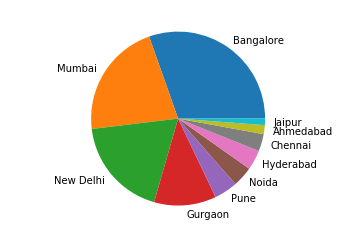

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
startup = pd.read_csv("../input/startup_funding.csv")
df = startup.copy()
df["CityLocation"].dropna(inplace = True)
d = {}
for i in df["CityLocation"]:
    d[i] = d.get(i,0) + 1
    
d["Bangalore"] += d["bangalore"] - d['SFO / Bangalore'] - d['Seattle / Bangalore']
d["New Delhi"] += d["Delhi"]
d["Hyderabad"] -= d["Goa/Hyderabad"] - d['Dallas / Hyderabad'] 
del d["bangalore"]
del d["Delhi"]
del d["Goa/Hyderabad"]
del d['Dallas / Hyderabad']

d1 = sorted(d, key=d.get, reverse=True)

c = 1
d2 = {}
for i in d1:
    if c == 11:
        break
    d2[i] = 0
    c += 1
    
for i in d2:
    for j in d:
        if i in j:
            d2[i] += d[j]
              
x = []
y = []
for i in d2:
    print(i,d2[i])
    x.append(i)
    y.append(d2[i])
plt.axis("equal")
plt.pie(y,labels = x)
plt.show()

* Ques 3 :
Find out if cities play any role in receiving funding.
Find top 10 Indian cities with most amount of fundings received. Find out percentage of funding each city has got (among top 10 Indian cities only).
Print the city and percentage with 2 decimal place after rounding off.
* Note:
Take city name "Delhi" as "New Delhi".
Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore".
For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also. Indian city name is first.
Print the city in descending order with respect to the percentage of funding.

In [3]:
def modified(amount):
    return int(amount.replace(',',''))
def city(c):
    c = str(c)
    return c.split("/")[0].strip()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
startup = pd.read_csv("../input/startup_funding.csv")
df = startup.copy()
df["CityLocation"].fillna('',inplace = True)
df["AmountInUSD"].fillna('0',inplace = True)
df["AmountInUSD"] = df["AmountInUSD"].apply(modified)
df["CityLocation"] = df["CityLocation"].apply(city)
df["CityLocation"].replace("bangalore","Bangalore",inplace = True)
df["CityLocation"].replace("Delhi","New Delhi",inplace = True)
df = df[df["CityLocation"] != ""]
a = df["CityLocation"]
b = df["AmountInUSD"]
d = {}
for i in a.index:
    d[a[i]] = d.get(a[i],0) + b[i]
    
d1 = sorted(d, key=d.get , reverse=True) 


c = 1
d2 = {}
for i in d1:
    if c == 11:
        break
    d2[i] = d2.get(i,0) + d[i]
    c += 1
sum = 0
for i in d2.values():
    sum += i
for i in d2:
    print(i,format(d2[i]*100/sum,"0.2f"))

Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


* Ques 4 :
There are 4 different type of investments. Find out percentage of amount funded for each investment type.
Plot a pie chart to visualise.
Print the investment type and percentage of amount funded with 2 decimal places after rounding off.
* Note :
Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.
Print the investment type in descending order with respect to the percentage of the amount funded.

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


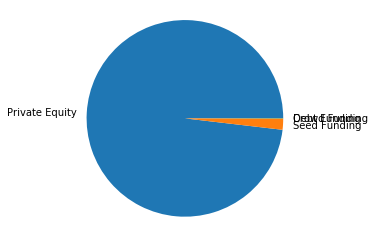

In [4]:
def modified(amount):
    return int(amount.replace(',',''))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
startup = pd.read_csv("../input/startup_funding.csv")
df = startup.copy()
df["AmountInUSD"].fillna('0',inplace = True)
df["AmountInUSD"] = df["AmountInUSD"].apply(modified)
df["InvestmentType"].fillna("",inplace = True)
df = df[df["InvestmentType"] != ""]
a = df["InvestmentType"]
b = df["AmountInUSD"]
d ={}
for i in a.index:
    d[a[i]] = d.get(a[i],0) + b[i]
d['Seed Funding'] += d['SeedFunding']
d['Private Equity'] += d['PrivateEquity']
d['Crowd Funding'] += d['Crowd funding']
del d['SeedFunding']
del d['PrivateEquity']
del d['Crowd funding']
sum = 0
for i in d:
    sum += d[i]
for i in d:
    print(i,format(d[i]*100/sum,"0.2f"))
plt.pie(d.values(),labels = d.keys())
plt.axis("equal")
plt.show()

* Ques 5 :
Which type of companies got more easily funding. To answer this question, find -
Top 5 industries and percentage of the total amount funded to that industry. (among top 5 only)
Print the industry name and percentage of the amount funded with 2 decimal place after rounding off.
* Note :
Ecommerce is the right word in IndustryVertical, so correct it.
Print the industry in descending order with respect to the percentage of the amount funded.

In [5]:
def modified(amount):
    return int(amount.replace(',',''))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
startup = pd.read_csv("../input/startup_funding.csv")
df = startup.copy()
df["AmountInUSD"].fillna('0',inplace = True)
df["AmountInUSD"] = df["AmountInUSD"].apply(modified)
df["IndustryVertical"].fillna("",inplace = True)
df["IndustryVertical"].replace("eCommerce","Ecommerce",inplace = True)
df["IndustryVertical"].replace("ECommerce","Ecommerce",inplace = True)
df["IndustryVertical"].replace("ecommerce","Ecommerce",inplace = True)
df = df[df["IndustryVertical"] != ""]
a = df["IndustryVertical"]
b = df["AmountInUSD"]
d ={}
for i in a.index:
    d[a[i]] = d.get(a[i],0) + b[i]
d1 = sorted(d, key=d.get , reverse=True) 
d1 = d1[:5]
d2 = {}
for i in d1:
    d2[i] = d[i]
sum = 0
for i in d2:
    sum += d2[i]
for i in d2:
    print(i,format(d2[i]*100/sum,"0.2f"))

Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


* Ques 6 :
Find top 5 startups with most amount of total funding.
Print the startup name in descending order with respect to amount of funding.
* Note:
Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names, ignore correcting all, just handle important ones.

In [6]:
def modified(amount):
    return int(amount.replace(',',''))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
startup = pd.read_csv("../input/startup_funding.csv")
df = startup.copy()
df["AmountInUSD"].fillna('0',inplace = True)
df["AmountInUSD"] = df["AmountInUSD"].apply(modified)
df["StartupName"].fillna("",inplace = True)
df["StartupName"].replace("Flipkart.com","Flipkart",inplace = True)
df["StartupName"].replace("Ola Cabs","Ola",inplace = True)
df["StartupName"].replace("Olacabs","Ola",inplace = True)
df["StartupName"].replace("Oyorooms","Oyo",inplace = True)
df["StartupName"].replace("OyoRooms","Oyo",inplace = True)
df["StartupName"].replace("OYO Rooms","Oyo",inplace = True)
df["StartupName"].replace("Oyo Rooms","Oyo",inplace = True)
df["StartupName"].replace("Paytm Marketplace","Paytm",inplace = True)
df = df[df["StartupName"] != ""]
a = df["StartupName"]
b = df["AmountInUSD"]
d = {}
for i in a.index:
    d[a[i]] = d.get(a[i],0) + b[i]
d1 = sorted(d, key=d.get , reverse=True) 
d1 = d1[:5]
for i in d1:
    print(i)

Paytm
Flipkart
Ola
Snapdeal
Oyo


* Ques 7 :
Find the Investors who have invested maximum number of times.
Print the investor name and number of times invested as integer value.
* Note:
In startup, multiple investors might have invested. So consider each investor for that startup.
Ignore the undisclosed investors.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
startup = pd.read_csv("../input/startup_funding.csv")
df = startup.copy()
df["InvestorsName"].fillna('',inplace = True)
df = df[df["InvestorsName"] != '']
df["InvestorsName"] = df["InvestorsName"].str.replace(",\xa0 ",", ")
df["InvestorsName"] = df["InvestorsName"].str.replace(", ","^")
df["InvestorsName"] = df["InvestorsName"].str.replace(",","^")
d = {}
for i in df["InvestorsName"]:
    if "^" in i:
        j = i.strip().split('^')
        for a in j:
            d[a] = d.get(a,0) + 1
    else:
        d[i] = d.get(i,0) + 1
d1 = sorted(d, key=d.get , reverse=True) 
print(d1[0],d[d1[0]])

Sequoia Capital 64


* Ques 8 :
Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.

Bangalore


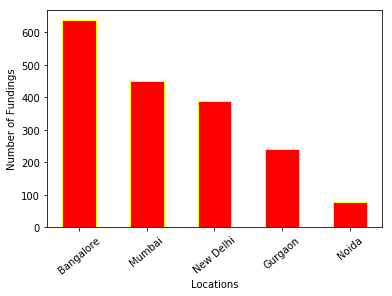

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
startup = pd.read_csv("../input/startup_funding.csv")  #reading data from startup_funding.csv file
df = startup.copy()  #creating a copy of startup dataframe...

df.dropna(subset = ["CityLocation"],inplace = True)  #removing row's having nan's in city location column
df["CityLocation"].replace("bangalore","Bangalore",inplace = True)  #replacing the wrong word with the correct one..
df["CityLocation"].replace("Delhi","New Delhi",inplace = True)

d1 = {}   #dictionary to maintain the number of fundings in the provided locations...

for i in df["CityLocation"]: #traversing through all the locations and maintaining the number of times the provided locations fetched...using if else..
    if "Bangalore" in i:
        d1["Bangalore"] = d1.get("Bangalore",0) + 1  
    elif "Mumbai" in i:
        d1["Mumbai"] = d1.get("Mumbai",0) + 1
    elif "New Delhi" in i:
        d1["New Delhi"] = d1.get("New Delhi",0) + 1
    elif "Noida" in i:
        d1["Noida"] = d1.get("Noida",0) + 1
    elif "Gurgaon" in i:
        d1["Gurgaon"] = d1.get("Gurgaon",0) + 1
        
cities = sorted(d1, key=d1.get , reverse=True)   #sorting the keys in reverse order(descending to aescending) according to the values...
fundings = []  

for i in cities:  #traversing through the cities...and created a new list of values...in sorted format 
    fundings.append(d1[i])
    
print(cities[0]) #printing the location having most number of fundings

plt.bar(cities,fundings,width = 0.5,color = "red" , edgecolor = "yellow")  #ploting the bar graph....cities vs no of fundings..
plt.xlabel("Locations")   #labeling x-axis
plt.ylabel("Number of Fundings")  #labeling y_axis
plt.xticks(rotation = 40) #rotating names in x-axis
plt.show()

* Ques 9 :
Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
startup = pd.read_csv("../input/startup_funding.csv")
df = startup.copy()

df.dropna(subset = ["InvestorsName"],inplace = True)  #removing row's having nan's in Investors name column..

d = {}  #creating a dictionary to maintain the number of times the investors name appeared...
for i in df["InvestorsName"].values:  #traversing through the investor names..to see the number of times the names appeared..
    if "," in i:  #if it contains multiple names ..then spliting it ..and traversing through each names separately..
        for j in i.strip().split(','):
            d[j.strip()] = d.get(j.strip(),0) + 1
    else:
        d[i.strip()] = d.get(i.strip(),0) + 1
d1 = sorted(d, key=d.get , reverse=True)[0:5]  #sorting the keys in reverse order(descending to aescending) according to the values...
for i in d1:  #printing the top 5 investors...funded maximum number of times...
    print(i)

Sequoia Capital
Accel Partners
Kalaari Capital
SAIF Partners
Indian Angel Network


* Ques 10 :
After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. This list will be more helpful than your previous list in finding the investment for your friend startup. Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
startup = pd.read_csv("startup_funding.csv")
df = startup.copy()

df.dropna(subset = ["StartupName","InvestorsName"],inplace = True)  #removing row's having nan's in Investors name and startupnames columns..
df["StartupName"].replace("Flipkart.com","Flipkart",inplace = True)  #replacing the wrong word with the correct one..
df["StartupName"].replace("Ola Cabs","Ola",inplace = True)
df["StartupName"].replace("Olacabs","Ola",inplace = True)
df["StartupName"].replace("Oyorooms","Oyo",inplace = True)
df["StartupName"].replace("OyoRooms","Oyo",inplace = True)
df["StartupName"].replace("OYO Rooms","Oyo",inplace = True)
df["StartupName"].replace("Oyo Rooms","Oyo",inplace = True)
df["StartupName"].replace("Paytm Marketplace","Paytm",inplace = True)

#firstly ...created a dictionary ...for each investor names ... maintained a set..means each key(investor's name) 
#having a value set(names of stratup's in which they invested)..
#set is taken as a value to avoid count of multiple investment in a single startup by an investor...
#in the set ..there are startup names in which investor's had invested...
#in case there are multiple investors for a single startup...used split function to split that ..and 
#traversed through each name separately...
d = {}
for i in df.index:
    e = df["InvestorsName"][i].strip()
    if "," in e:
        for j in e.strip().split(','):
            if j.strip() in d:
                d[j.strip()].add(df["StartupName"][i].strip())
            else:
                s = set()
                d[j.strip()] = s
                d[j.strip()].add(df["StartupName"][i].strip())
    else:
        a = e.strip()
        if a in d: 
            d[a].add(df["StartupName"][i].strip())
        else:
            s = set()
            d[a] = s
            d[a].add(df["StartupName"][i].strip())
            
d1 = {}  #created a dictionary where key is investor's name and value is count of startup's in which they had invested..
for i in d:
    if i == "":
        continue
    d1[i] = len(d[i])
    
d2 = sorted(d1, key=d1.get , reverse=True)[0:5]  #sorting the keys according to there values in descending order..and taking the top 5 investor's among all..
for i in d2:
    print(i)

Sequoia Capital
Accel Partners
Kalaari Capital
Indian Angel Network
Blume Ventures


* Ques 11 :
Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor. Since your friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
startup = pd.read_csv("../input/startup_funding.csv")
df = startup.copy()
df.dropna(subset = ["InvestorsName"],inplace = True) #removing row's having nan's in Investors name column..
df["InvestorsName"].replace("Undisclosed Investors","",inplace = True) #replacing the undisclosed investors name by null values ..
df["InvestorsName"].replace("Undisclosed investors","",inplace = True)
df = df[(df["InvestmentType"] == "Seed Funding") | (df["InvestmentType"] == "Crowd Funding")]  #keeping only those rows having investment type seed funding and crowd funding..

d = {}  #creating a dictionary to maintain the number of times the investors name appeared...
for i in df["InvestorsName"].values:  #traversing through the investor names..to see the number of times the names appeared..
    if "," in i:  #if it contains multiple names ..then spliting it ..and traversing through each names separately..
        for j in i.strip().split(','):
            d[j.strip()] = d.get(j.strip(),0) + 1
    else:
        d[i.strip()] = d.get(i.strip(),0) + 1
        
del d[""] #deleting the NULL key from dictionary

d1 = sorted(d, key=d.get , reverse=True)[0:5]  #sorting the keys according to there values in descending order..and taking the top 5 investor's among all..
for i in d1:
    print(i)

Indian Angel Network
Rajan Anandan
LetsVenture
Anupam Mittal
Kunal Shah


 * Ques 12 :
Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a saviour to help your friend and want to create a list of probable new new investors. Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
startup = pd.read_csv("../input/startup_funding.csv")
df = startup.copy()
df.dropna(subset = ["InvestorsName"],inplace = True)  #removing row's having nan's in Investors name column..
df["InvestorsName"].replace("Undisclosed Investors","",inplace = True)  #replacing the undisclosed investors name by null values ..
df["InvestorsName"].replace("Undisclosed investors","",inplace = True)
df = df[(df["InvestmentType"] == "Private Equity")]  #keeping only those rows having investment type private equity..

d = {}  #creating a dictionary to maintain the number of times the investors name appeared...
for i in df["InvestorsName"].values:  #traversing through the investor names..to see the number of times the names appeared..
    if "," in i:  #if it contains multiple names ..then spliting it ..and traversing through each names separately..
        for j in i.strip().split(','):
            d[j.strip()] = d.get(j.strip(),0) + 1
    else:
        d[i.strip()] = d.get(i.strip(),0) + 1
        
del d[""] #deleting the NULL key from dictionary

d1 = sorted(d, key=d.get , reverse=True)[0:5]  #sorting the keys according to there values in descending order..and taking the top 5 investor's among all..
for i in d1:
    print(i)

Sequoia Capital
Accel Partners
Kalaari Capital
SAIF Partners
Blume Ventures
